Link : [Kaggle Page](https://www.kaggle.com/datasets/mariyamalshatta/nike-vs-addidas-unspervised-clustering/data)

## Data Description 
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

## Primary Objective
Machine learning clustering techniques approach for extracting actionable insights from the Nike and Adidas footwear dataset, enabling data-driven decision making and strategic business recommendations.

## Detailed Objectives

1. **Data Analysis & Pattern Discovery**
   
2. **Advanced Machine Learning Clustering Implementation**
 
3. **Business Intelligence Generation**


## Expected Outcomes
The project aims to deliver a comprehensive understanding of product dynamics between Nike and Adidas Sneakers, enabling informed decision-making for product development and marketing strategies.

1. **Product grouping that can implement as a recommendation or segmentation**
   


In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')
df.head(100)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39


In [2]:
df.at[0, 'Brand'] = 'Adidas ORIGINALS'

In [3]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [4]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2792,Nike Metcon 5 AMP,CD3395-006,0,11995,0,Nike,5.0,2
2861,Nike Mercurial Vapor 13 Club Neymar Jr. TF,AT8000-104,0,5495,0,Nike,0.0,0
2862,Nike Mercurial Vapor 13 Elite Neymar Jr. FG,AT7898-104,0,22995,0,Nike,0.0,0
2863,Nike Mercurial Vapor 13 Academy Neymar Jr. TF,AT7995-104,0,7995,0,Nike,0.0,0
2864,Nike Mercurial Vapor 13 Academy Neymar Jr. MG,AT7960-104,0,7995,0,Nike,0.0,0
2865,LeBron 17,BQ3177-100,0,16995,0,Nike,4.5,47
2868,Air Jordan XXXIV PF,BQ3381-600,0,14995,0,Nike,5.0,2
2880,Nike Mercurial Vapor 13 Club Neymar Jr IC,AT7998-104,0,5495,0,Nike,0.0,0
2932,Nike Mercurial Vapor 13 Club IC,AT7997-606,0,4995,0,Nike,0.0,0
2956,Nike Mercurial Vapor 13 Elite SE FG,CD6720-808,0,21995,0,Nike,0.0,0


In [5]:
df.drop_duplicates(inplace = True)
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,3.0,1
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [6]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [7]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3180.0,6993.0,4677.0,0.0,4599.0,5999.0,8999.0,29999.0
Sale Price,3180.0,6028.0,4192.0,449.0,2999.0,4599.0,7995.0,36500.0
Discount,3180.0,28.0,22.0,0.0,0.0,40.0,50.0,60.0
Rating,3180.0,3.0,1.0,0.0,3.0,4.0,4.0,5.0
Reviews,3180.0,42.0,31.0,0.0,12.0,39.0,69.0,223.0


In [8]:
df.isnull().values.any()

False

In [9]:
# To count unique values for each column
unique_counts_per_column = df.nunique(axis=0)

In [10]:
unique_counts_per_column 

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               4
Rating             32
Reviews           102
dtype: int64

All columns in DataFrame: ['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount', 'Brand', 'Rating', 'Reviews']


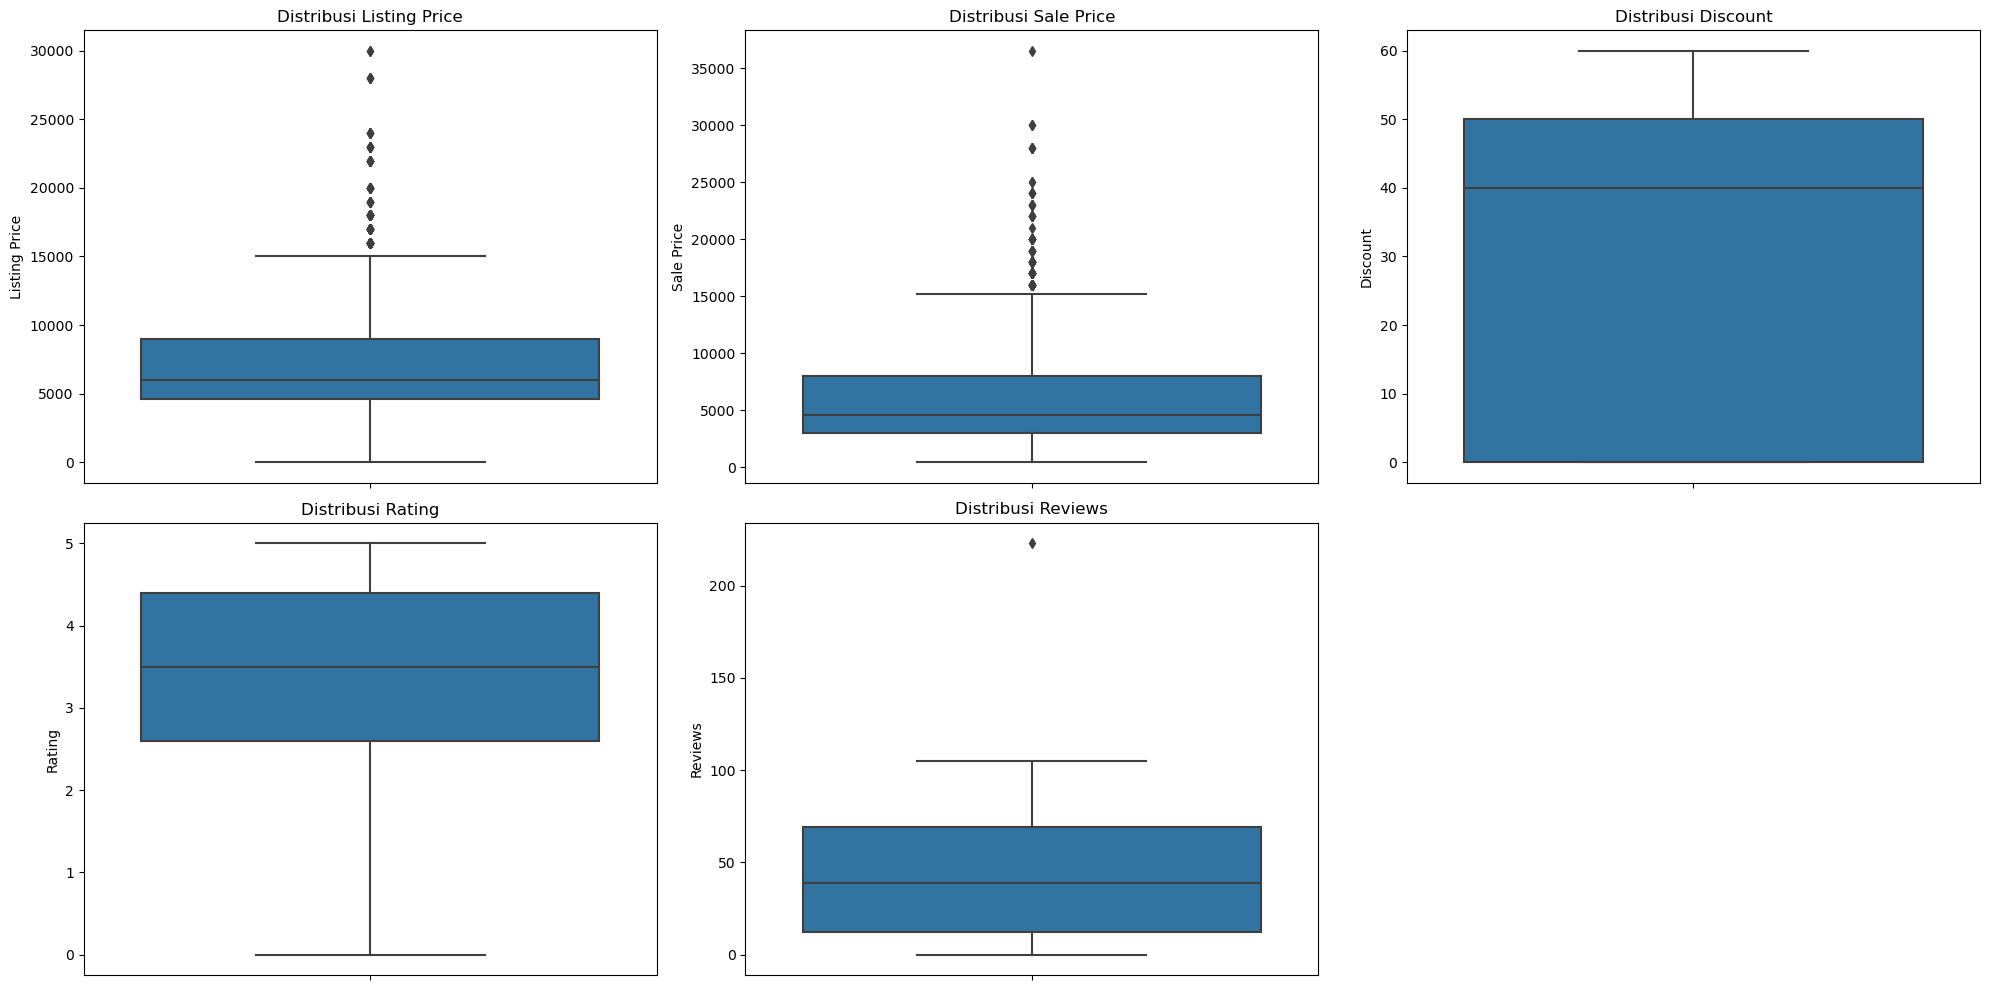

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verify the columns in the DataFrame
print("All columns in DataFrame:", df.columns.tolist())

# List of columns you want to drop
columns_to_drop = ['Product Name', 'Product ID', 'Brand']

# Select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Ensure you only drop columns that are both in the DataFrame and of numeric type
existing_columns_to_drop = [col for col in columns_to_drop if col in numerical_cols]

# Drop the existing columns to get the final list of numerical columns
numerical_cols = numerical_cols.drop(existing_columns_to_drop)

# Calculate subplots configuration
num_cols = len(numerical_cols)
cols_per_row = 3
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

# Initialize subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Create a boxplot for each valid numerical column
for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'Distribusi {col}', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=10)

# Remove any unused axes
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

All columns in DataFrame: ['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount', 'Brand', 'Rating', 'Reviews']


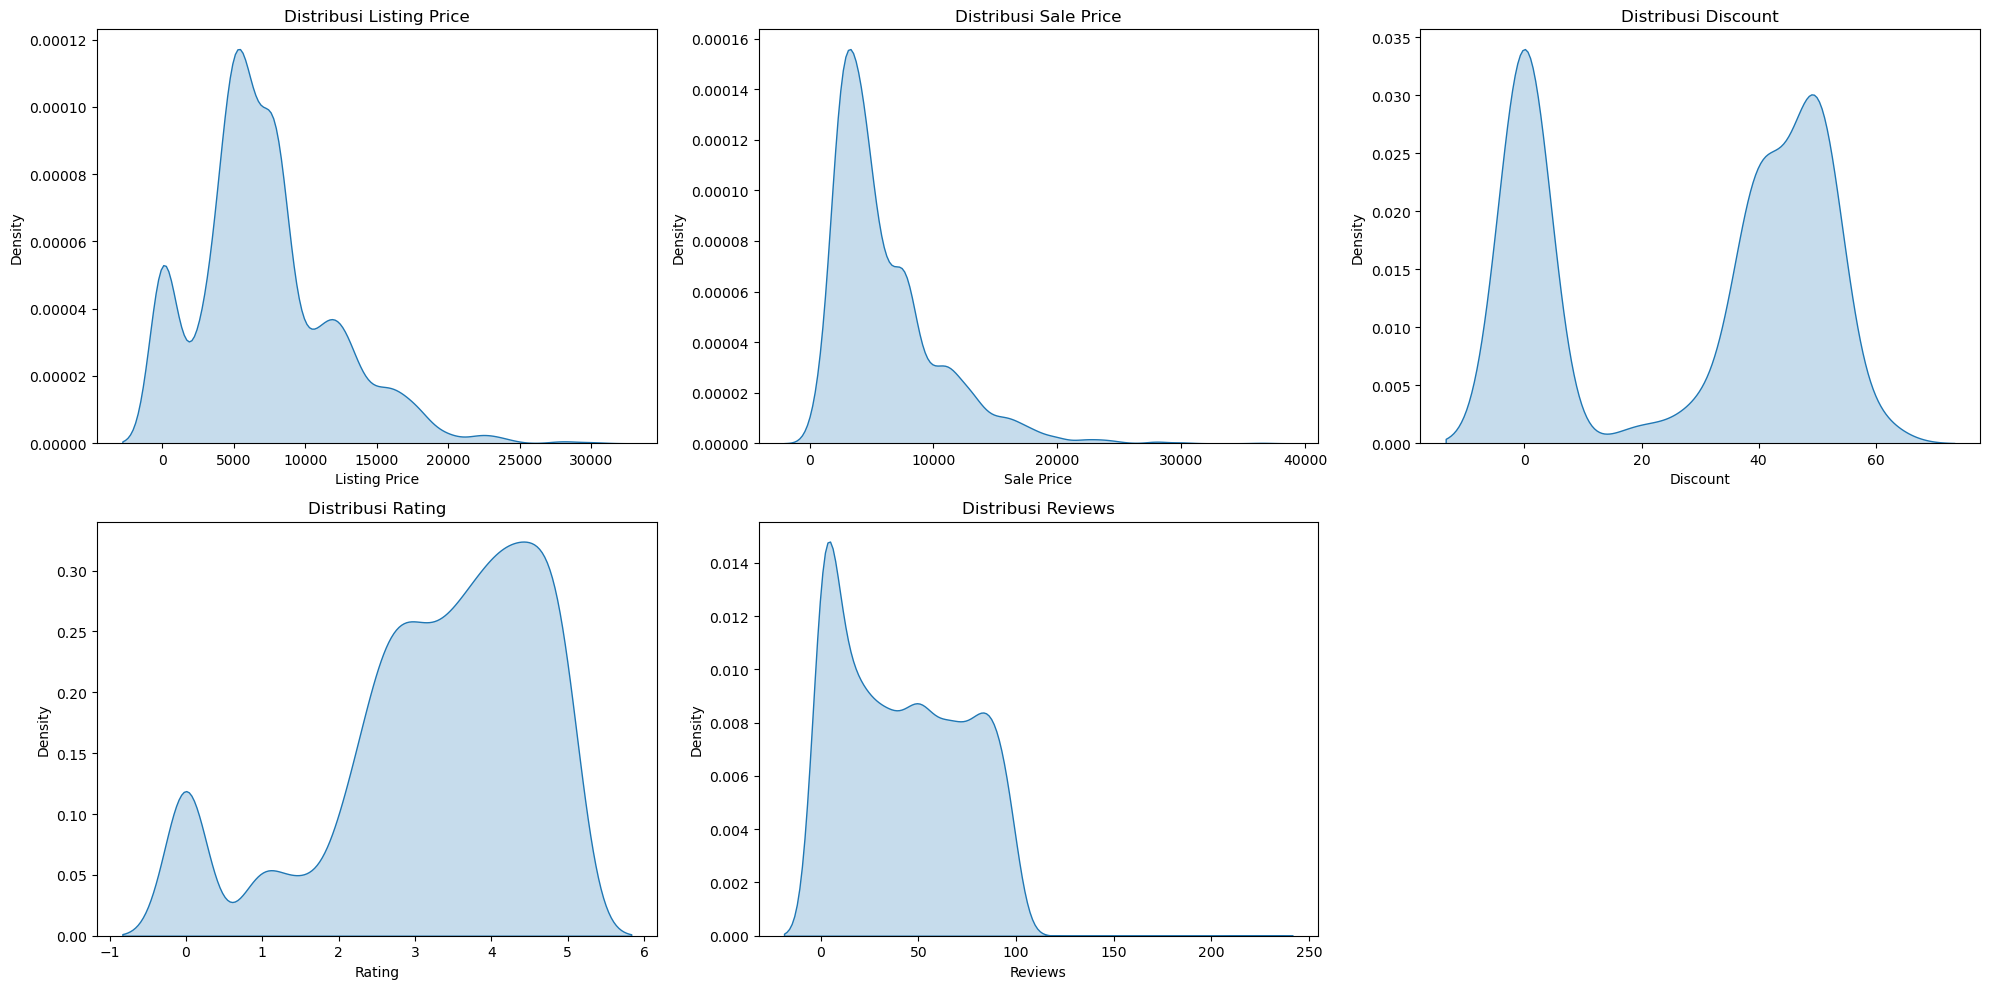

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verify the columns in the DataFrame
print("All columns in DataFrame:", df.columns.tolist())

# List of columns you want to drop
columns_to_drop = ['Product Name', 'Product ID', 'Brand']

# Select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate subplots configuration
num_cols = len(numerical_cols)
cols_per_row = 3
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

# Initialize subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Create a KDE plot for each valid numerical column
for idx, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, ax=axes[idx], fill=True)
    axes[idx].set_title(f'Distribusi {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)

# Remove any unused axes
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

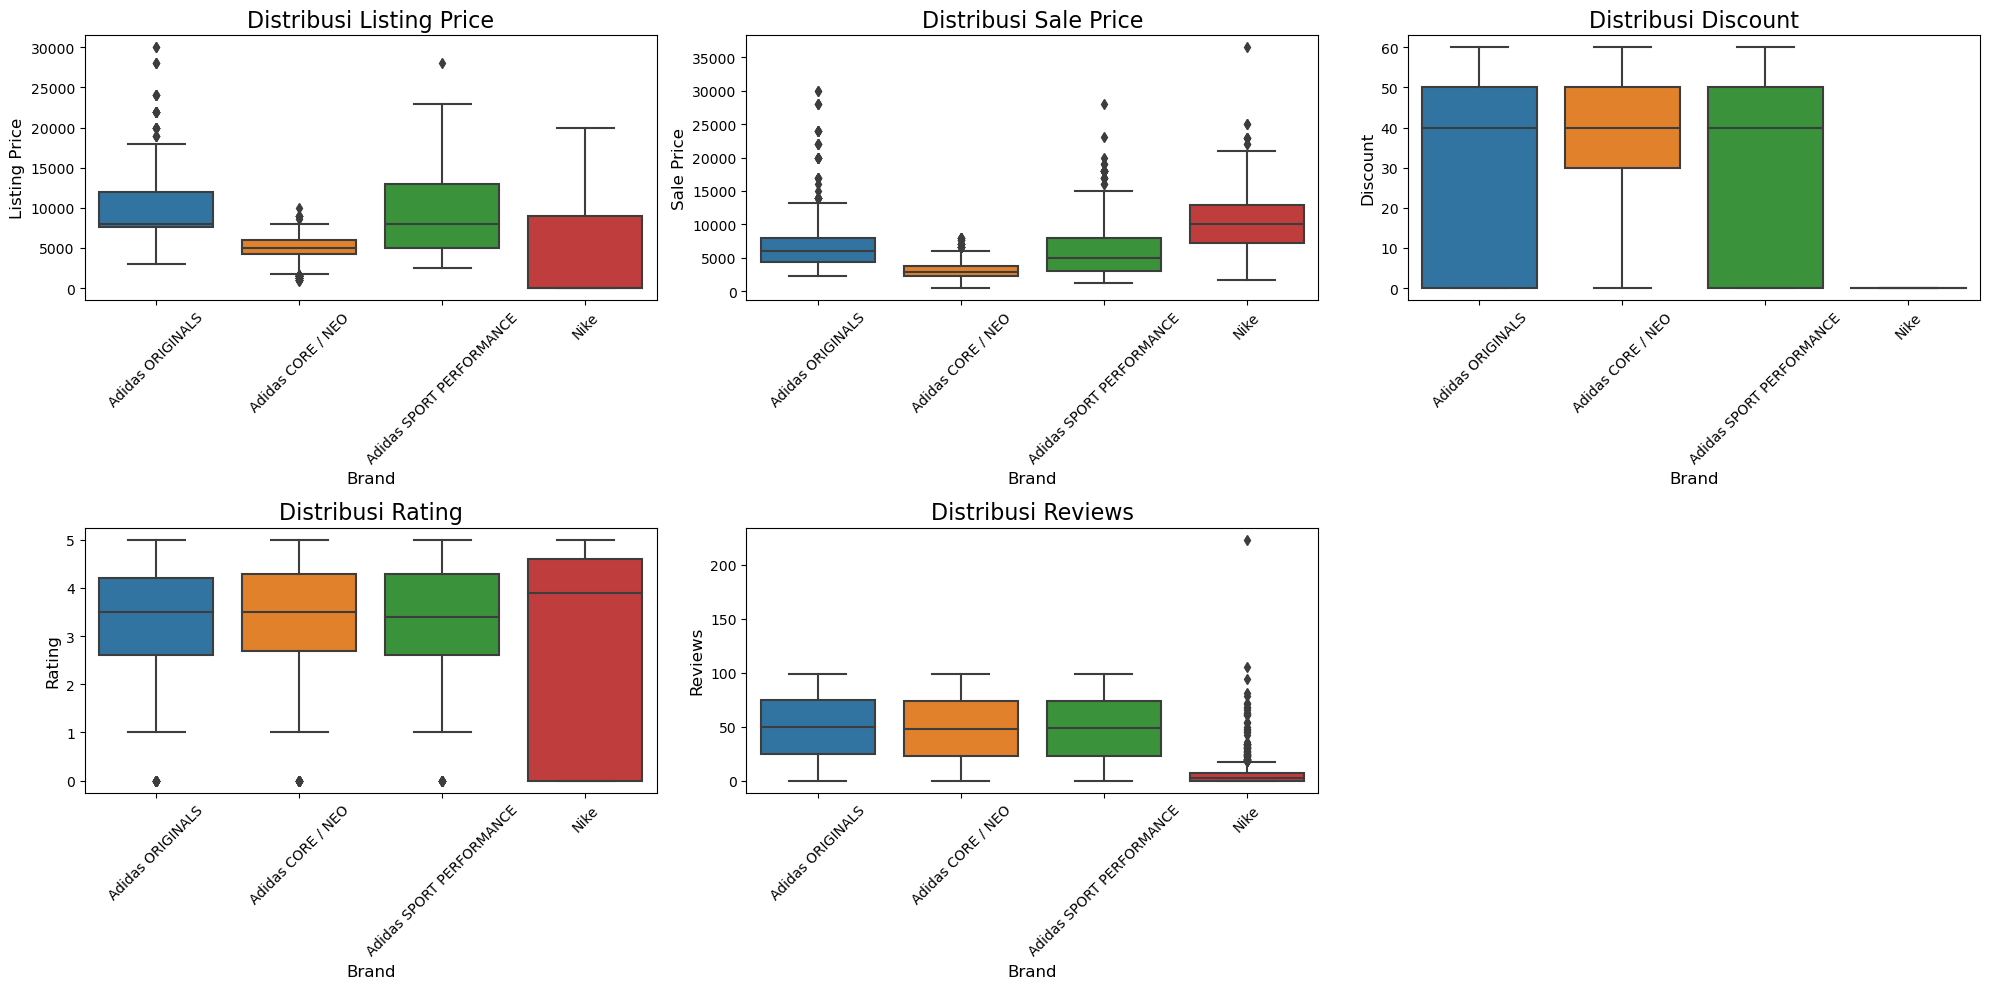

In [13]:
# Identify the top 5 brands based on their occurrence
top_brands = df['Brand'].value_counts().nlargest(5).index.tolist()

# Filter the DataFrame to include only top 5 brands
df_top_brands = df[df['Brand'].isin(top_brands)]

# Select all integer and float columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Create a box plot for each numeric column
for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df_top_brands, x='Brand', y=col, ax=axes[idx])
    axes[idx].set_title(f'Distribusi {col}', fontsize=16)
    axes[idx].set_xlabel('Brand', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.show()

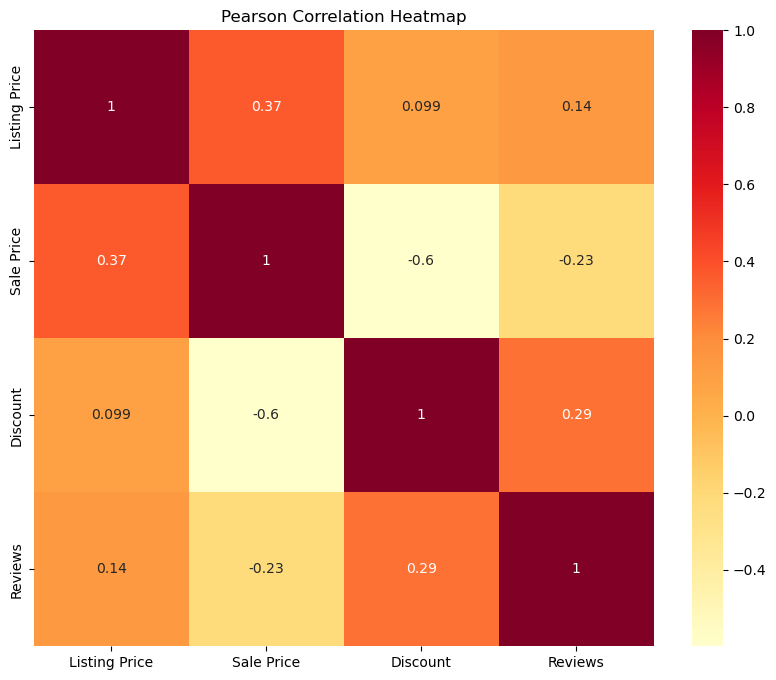

In [14]:
# Get the integer columns
int_cols = [col for col in df.columns if df[col].dtype == 'int64']

# Calculate Pearson correlation matrix
corr_matrix = df[int_cols].corr(method='pearson')

# Create a heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [173]:
df.isnull().values.any()

False

In [174]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df['Brand'] = df['Brand'].astype(str)

# Perform OneHotEncoding on 'Brand'
brand_encoder = OneHotEncoder(drop='first', sparse_output=False)
brand_encoded = brand_encoder.fit_transform(df[['Brand']])
brand_columns = brand_encoder.get_feature_names_out(['Brand'])
df_encoded = pd.DataFrame(brand_encoded, columns=brand_columns, index=df.index)

# Concatenate encoded brand back into original DataFrame
df = pd.concat([df, df_encoded], axis=1)
product_info = df[['Product ID', 'Product Name', 'Brand']]

Clusters found: {0, 1, 2, 3, 4, 5, 6, 7, -1}


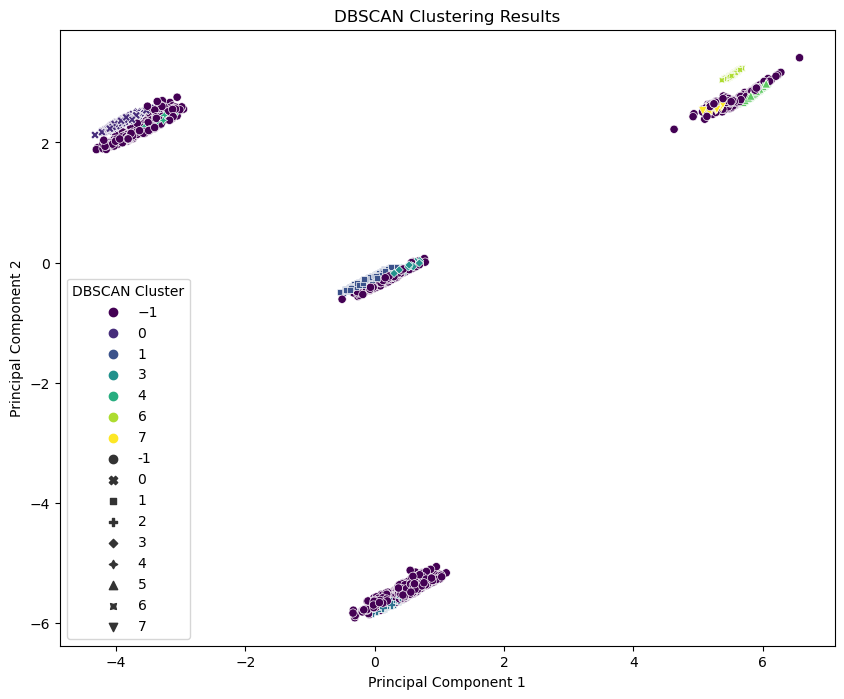

DBSCAN Cluster Sizes:
 DBSCAN Cluster
-1    1338
 1     739
 0     371
 3     149
 5     135
 4     124
 6     120
 2     114
 7      90
Name: count, dtype: int64


In [180]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Concatenate encoded brand back into original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Prepare the data by dropping non-numeric or unnecessary columns
X = df.drop(['Product ID', 'Product Name', 'Brand'], axis=1)


# Scale features before applying DBSCAN
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=50)  # You may need to adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(scaled_features)

# Add DBSCAN labels to the DataFrame
df['DBSCAN Cluster'] = dbscan_labels

# Unique clusters and noise identified by DBSCAN
unique_clusters = set(dbscan_labels)
print(f"Clusters found: {unique_clusters}")

# Re-run PCA if necessary and add components to the DataFrame
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

product_info['Cluster'] = dbscan_labels

# Visualize resulting clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN Cluster', data=df, palette='viridis', style='DBSCAN Cluster', markers=True)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyze number of points per cluster
cluster_sizes_dbscan = df['DBSCAN Cluster'].value_counts()
print("DBSCAN Cluster Sizes:\n", cluster_sizes_dbscan)

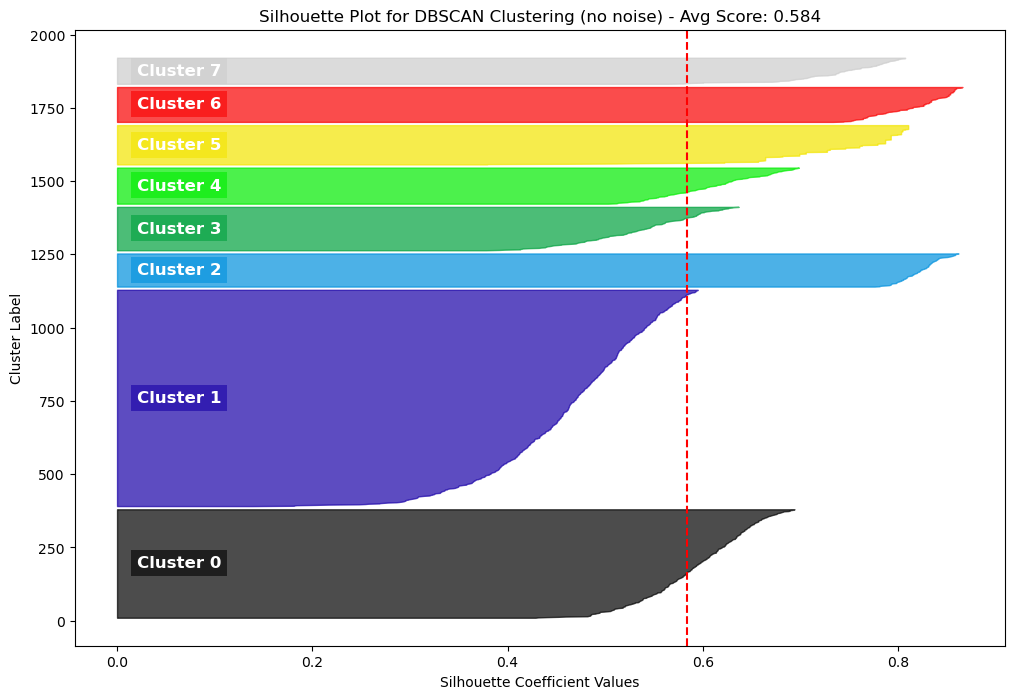

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Re-calculate silhouette score for clustered points only (excluding noise)
# Note: This calculation should match the one you use for visualization
filtered_mask = dbscan_labels != -1
silhouette_avg = silhouette_score(scaled_features[filtered_mask], dbscan_labels[filtered_mask])
sample_silhouette_values = silhouette_samples(scaled_features[filtered_mask], dbscan_labels[filtered_mask])

fig, ax = plt.subplots(figsize=(12, 8))
y_lower = 10

# Iterate through the valid clusters, excluding noise (-1)
unique_labels = [label for label in set(dbscan_labels) if label != -1]
colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    ith_cluster_silhouette_values = sample_silhouette_values[dbscan_labels[filtered_mask] == label]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Center the text within its cluster area
    ax.text(0.02, y_lower + 0.5 * size_cluster_i, f'Cluster {label}', verticalalignment='center',
            fontsize=12, color='white', weight='bold', 
            bbox=dict(facecolor=color, alpha=0.6, edgecolor='none'))

    y_lower = y_upper + 10

ax.set_title(f'Silhouette Plot for DBSCAN Clustering (no noise) - Avg Score: {silhouette_avg:.3f}')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster Label')

# The vertical line for the average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

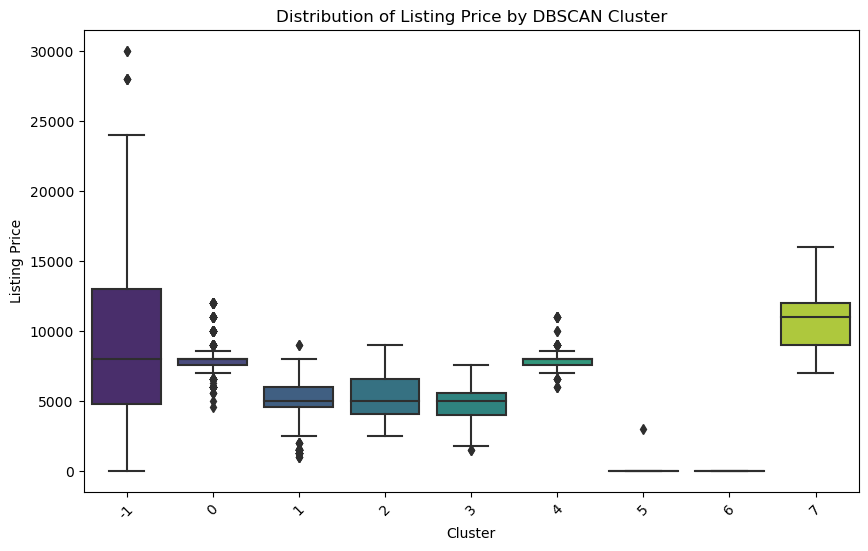

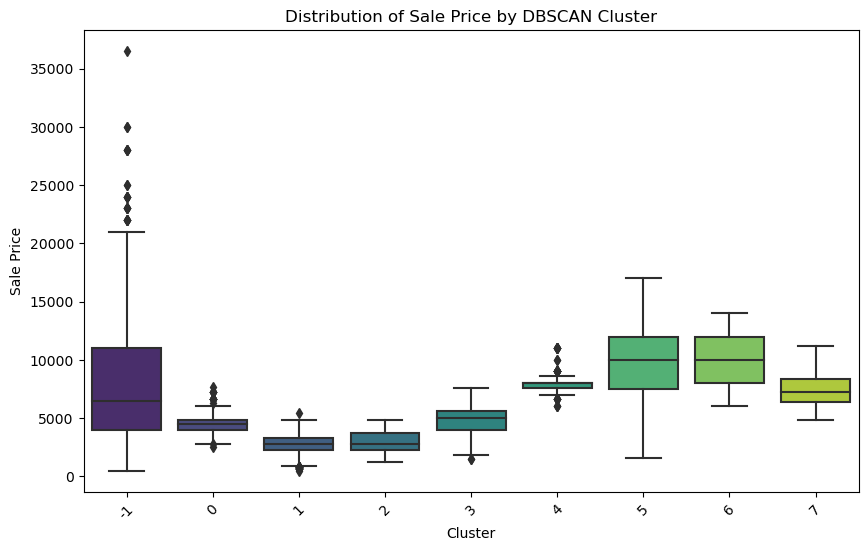

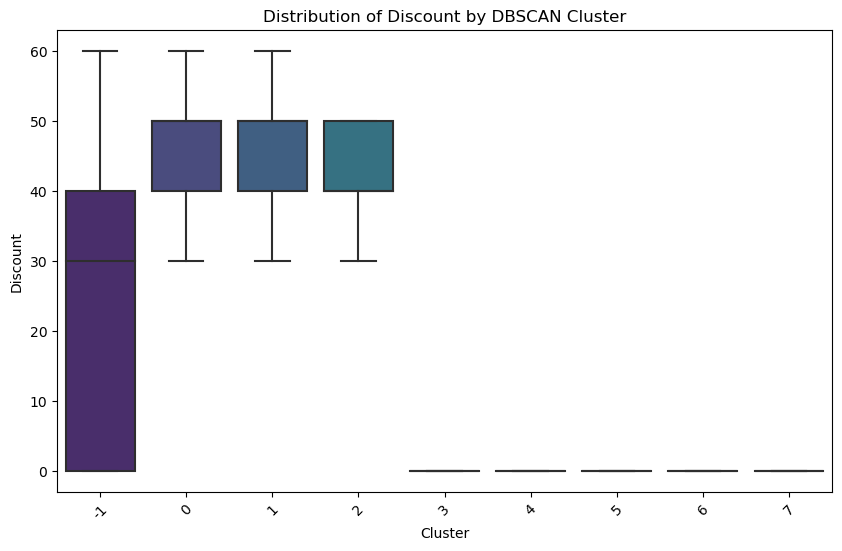

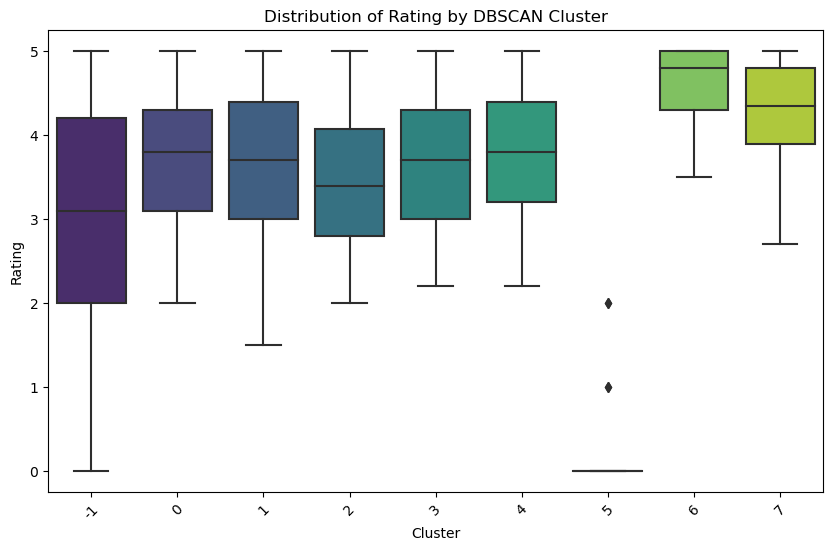

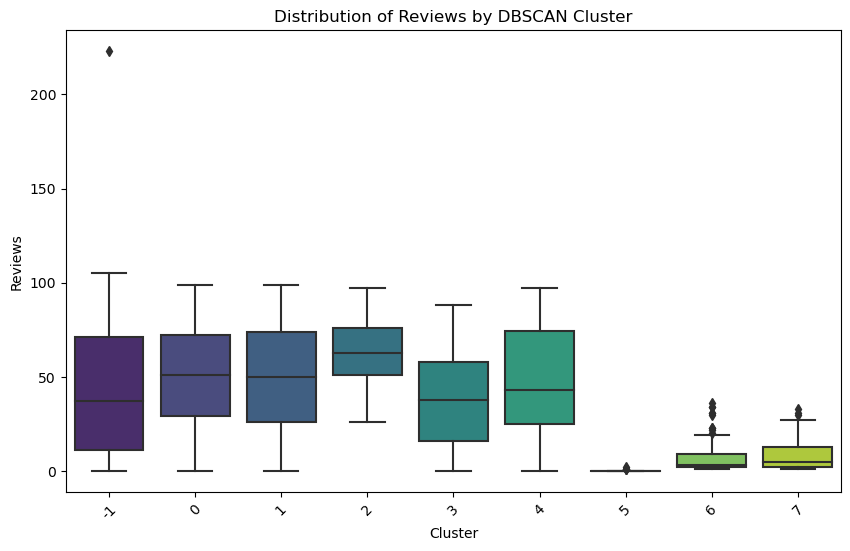

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to visualize with box plots
features_for_boxplot = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Check which clustering result should be used
cluster_label = 'DBSCAN Cluster'  # Use the cluster labels resulted from DBSCAN

# Create a box plot for each feature colored by cluster
for feature in features_for_boxplot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cluster_label, y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by {cluster_label}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

In [183]:
# Group by cluster and calculate descriptive statistics
descriptive_stats = df.groupby('DBSCAN Cluster').agg({
    'Listing Price': ['mean', 'median', 'std', 'count'],
    'Sale Price': ['mean', 'median', 'std', 'count'],
    'Discount': ['mean', 'median', 'std', 'count'],
    'Rating': ['mean', 'median', 'std', 'count'],
    'Reviews': ['mean', 'median', 'std', 'count']
})

descriptive_stats.T.round(2)

DBSCAN Cluster             -1        0        1        2        3        4  \
Listing Price mean    9050.49  8167.46  5130.12  5237.60  4912.42  8100.61   
              median  7999.00  7999.00  4999.00  4999.00  4999.00  7999.00   
              std     5653.17  1403.93  1367.54  1692.33  1224.62   968.95   
              count   1338.00   371.00   739.00   114.00   149.00   124.00   
Sale Price    mean    7623.09  4473.31  2742.96  2871.81  4912.42  8100.61   
              median  6499.00  4499.00  2759.00  2759.00  4999.00  7999.00   
              std     5033.27   858.99   800.06   886.33  1224.62   968.95   
              count   1338.00   371.00   739.00   114.00   149.00   124.00   
Discount      mean      23.71    45.09    46.39    44.65     0.00     0.00   
              median    30.00    50.00    50.00    40.00     0.00     0.00   
              std       22.33     5.85     6.12     5.18     0.00     0.00   
              count   1338.00   371.00   739.00   114.00   149.00   124.00   
Rating        mean       2.95     3.70     3.67     3.43     3.66     3.78   
              median     3.10     3.80     3.70     3.40     3.70     3.80   
              std        1.50     0.78     0.86     0.76     0.80     0.76   
              count   1338.00   371.00   739.00   114.00   149.00   124.00   
Reviews       mean      41.74    50.99    49.74    63.28    38.52    48.19   
              median    37.00    51.00    50.00    62.50    38.00    43.00   
              std       32.34    26.72    28.95    16.49    24.47    28.14   
              count   1338.00   371.00   739.00   114.00   149.00   124.00   

DBSCAN Cluster              5         6         7  
Listing Price mean      22.19      0.00  10771.67  
              median     0.00      0.00  10995.00  
              std      257.77      0.00   2204.75  
              count    135.00    120.00     90.00  
Sale Price    mean    9915.01  10038.33   7499.33  
              median  9995.00   9995.00   7197.00  
              std     3685.72   2065.23   1543.41  
              count    135.00    120.00     90.00  
Discount      mean       0.00      0.00      0.00  
              median     0.00      0.00      0.00  
              std        0.00      0.00      0.00  
              count    135.00    120.00     90.00  
Rating        mean       0.04      4.63      4.26  
              median     0.00      4.80      4.35  
              std        0.27      0.43      0.62  
              count    135.00    120.00     90.00  
Reviews       mean       0.04      6.78      8.83  
              median     0.00      3.00      5.00  
              std        0.23      8.10      8.41  
              count    135.00    120.00     90.00

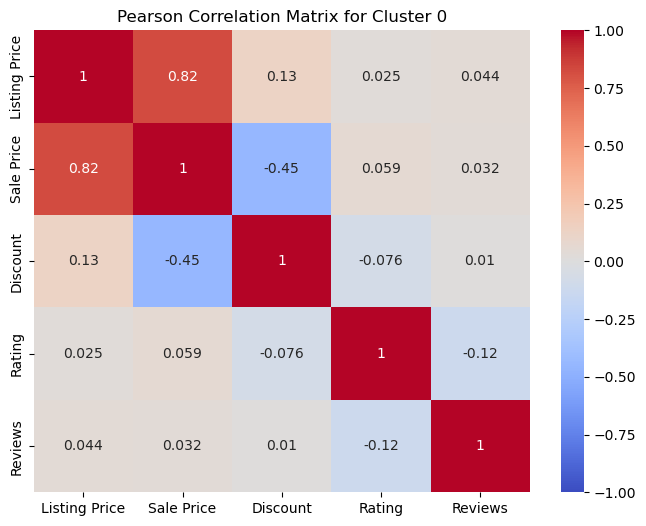

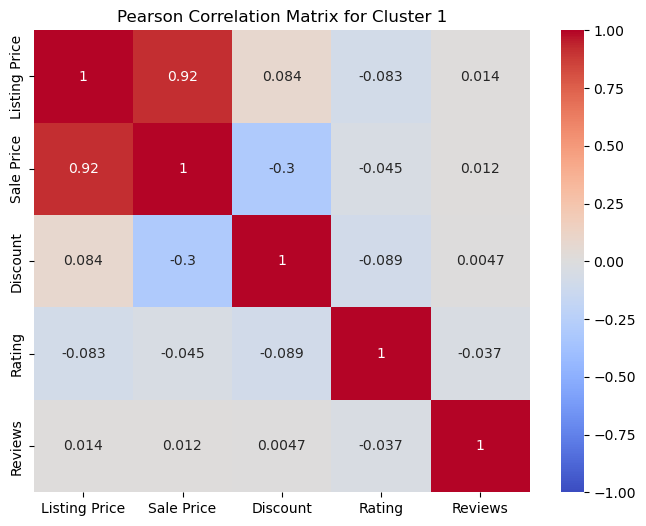

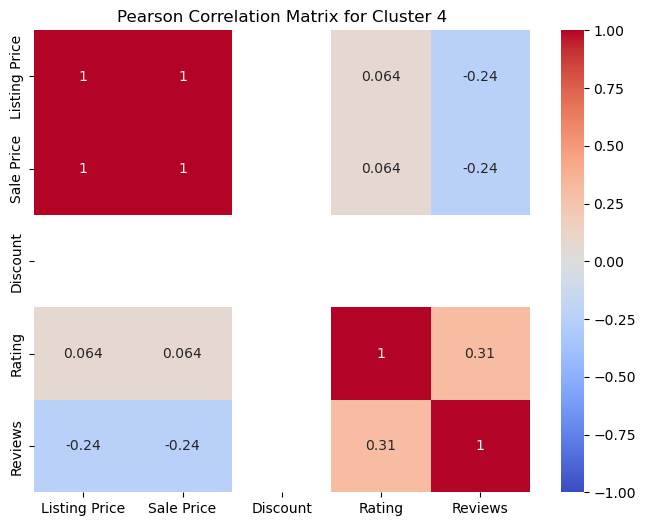

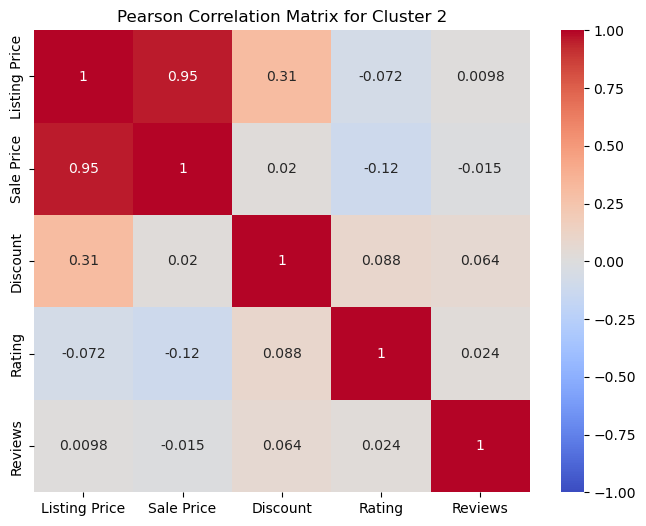

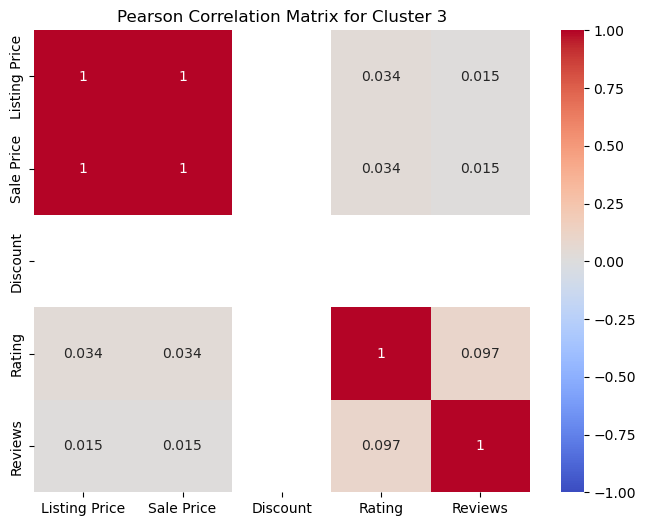

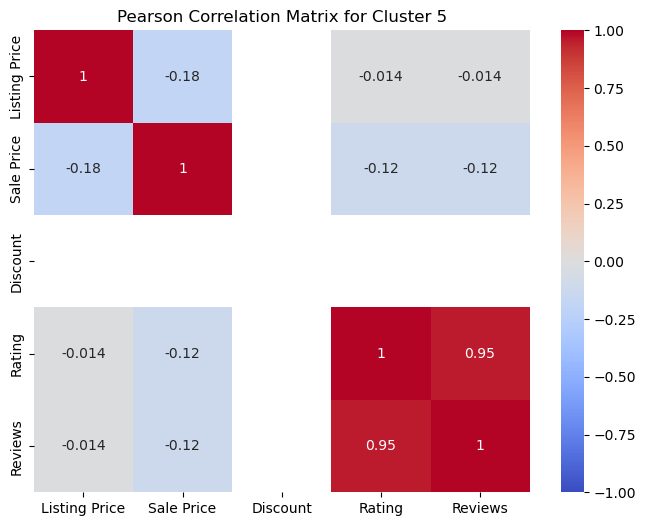

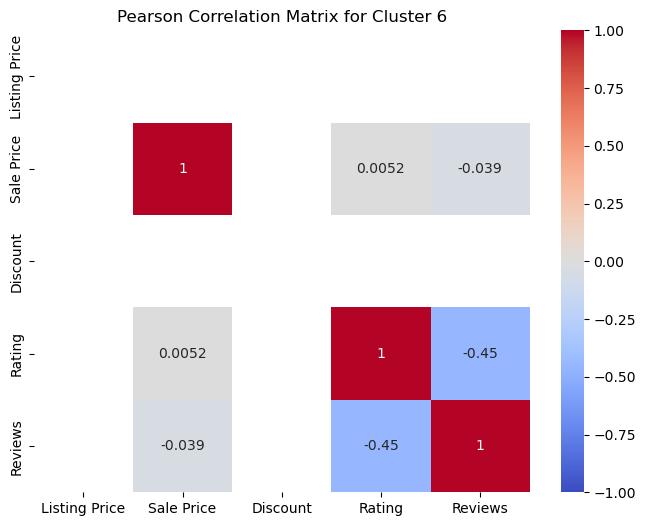

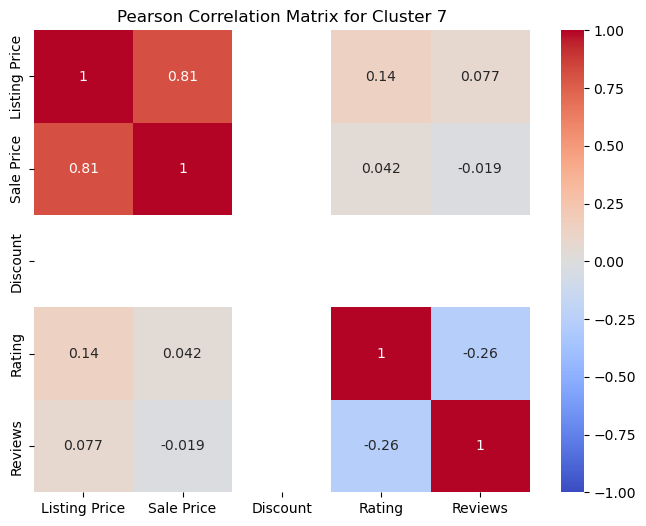

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to include in the correlation analysis
features_for_correlation = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Iterate over each unique cluster to calculate and plot the correlation matrix
for cluster in df['DBSCAN Cluster'].unique():
    if cluster == -1:
        continue  # Skip noise if you do not want to include it

    # Filter the data for the current cluster
    cluster_data = df[df['DBSCAN Cluster'] == cluster]
    
    # Calculate the correlation matrix
    corr_matrix = cluster_data[features_for_correlation].corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Pearson Correlation Matrix for Cluster {cluster}')
    plt.show()

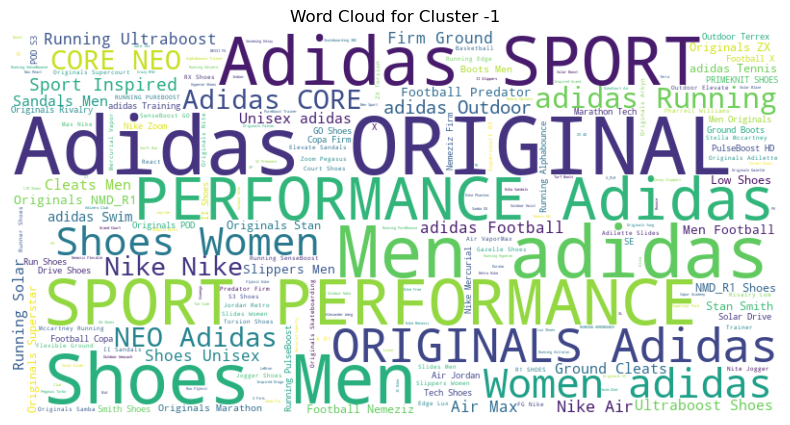

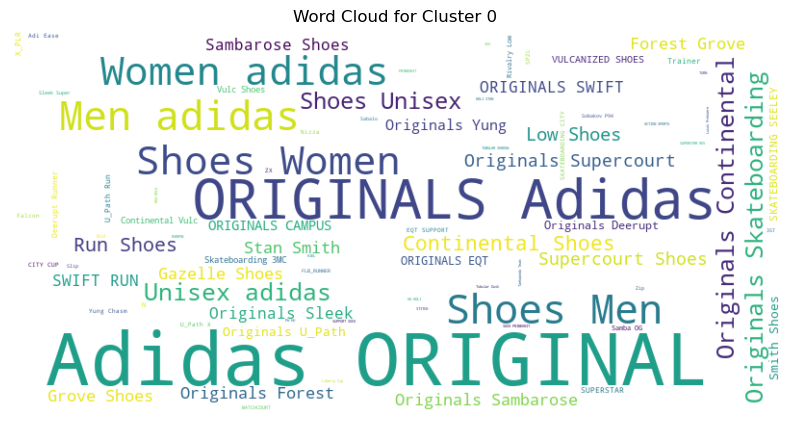

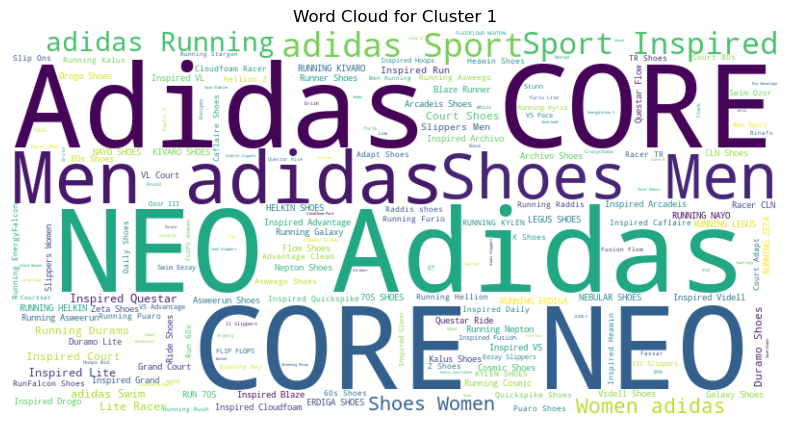

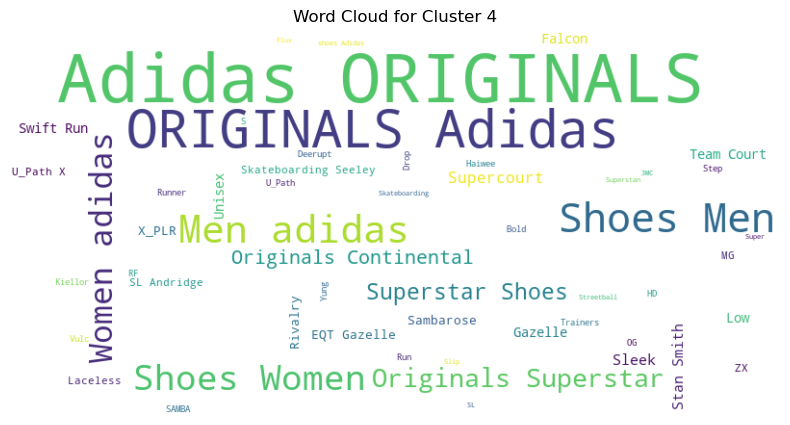

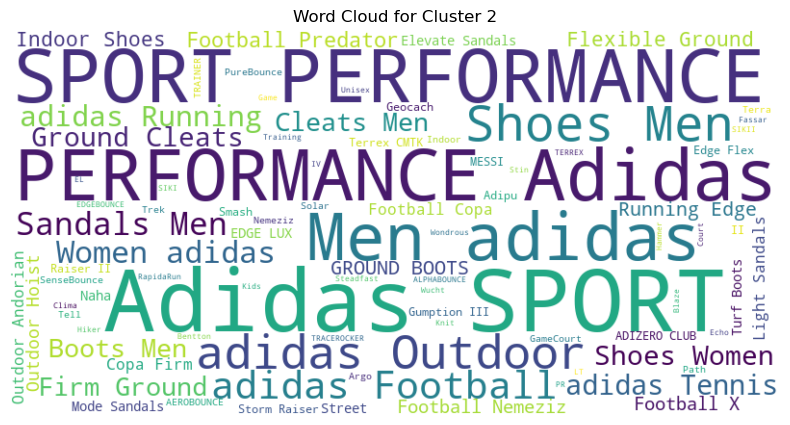

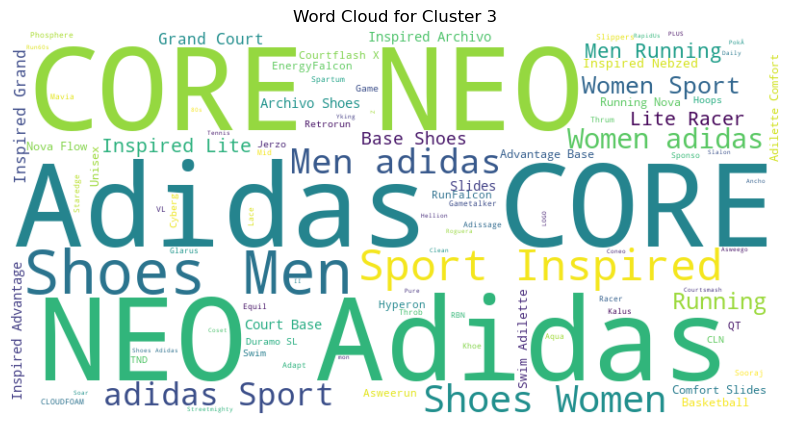

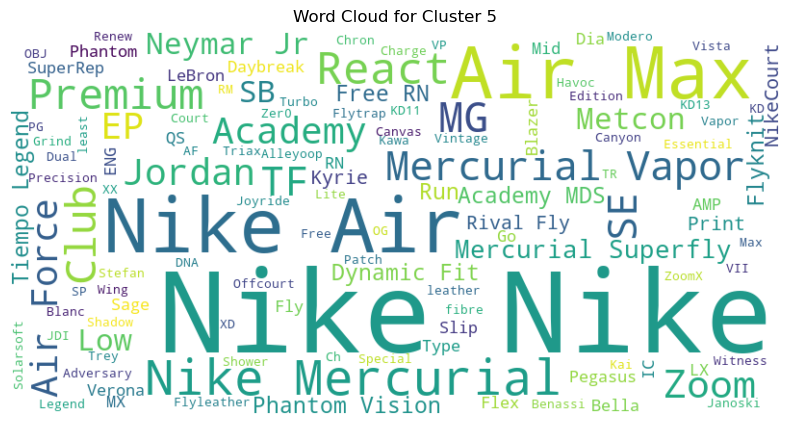

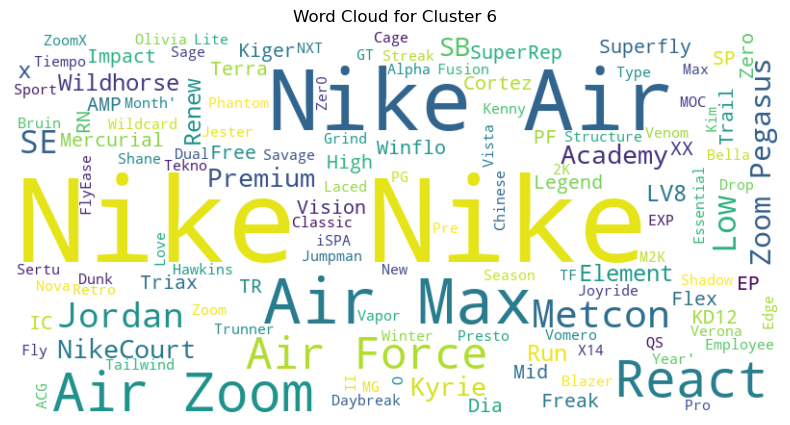

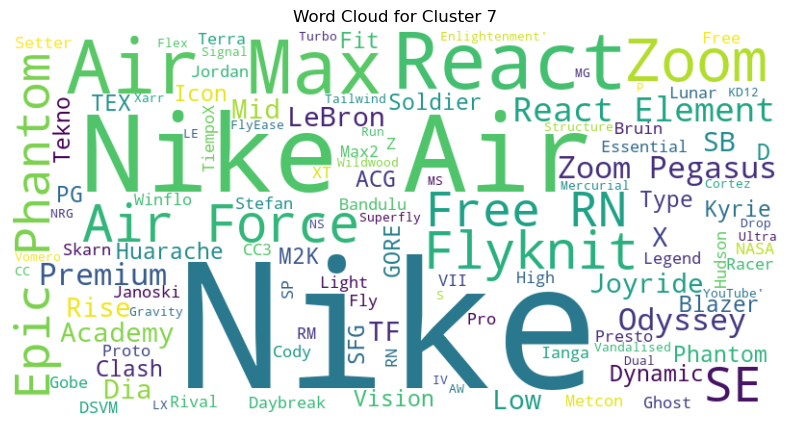

In [185]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each cluster
for cluster in product_info['Cluster'].unique():
    cluster_data = product_info[product_info['Cluster'] == cluster]

    # Concatenate Product Names and Brands for the word cloud
    product_text = ' '.join(cluster_data['Product Name'])
    brand_text = ' '.join(cluster_data['Brand'])
    full_text = product_text + ' ' + brand_text

    # Generate WordCloud for the combined text
    generate_word_cloud(full_text, f'Word Cloud for Cluster {cluster}')